In [1]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np  # Wichtig für np.random.choice!
import seaborn as sns
import sys  # Systemfunktionen 

# Eigene Funktionen (ausgelagert)
sys.path.append("../scripts") # Pfad zu den Funktionen
# Funktionen aus clusteranalyse.py importieren
from clusteranalyse import cluster_trend_table, group_cluster_by_year, cluster_trend_plot, get_word_color_map

In [2]:
# Vorbereitung
# # CSV-Datei einlesen (der bereinigte Datensatz mit Wortzählungen)
df_bvg = pd.read_csv("output/wordcount_pm_clean.csv")

In [3]:
df_bvg.head()

,word,count,source,date,year
0,…marzahn-hellersdorf!,1,bvg_pm,2021-08-06,2021
1,punkte,1,bvg_pm,2021-08-06,2021
2,berliner*innen,1,bvg_pm,2021-08-06,2021
3,bezirk,2,bvg_pm,2021-08-06,2021
4,musikalische,1,bvg_pm,2021-08-06,2021


In [4]:
# 1. Top-down-Analyse (zentrale Begriffe aus BVG-Strategie)
# Cluster und Begriffe definieren
clusters_topdown = {
    "Mobilität & Infrastruktur": ["verkehr", "nahverkehr", "linie", "netz", "ausbau", "vernetzung", "mobilitätswende", "mobilität", "pünktlichkeit", "verlässlichkeit", "flexibel"],
    "Innovation & Digitalisierung": ["innovation", "zukunft", "digital", "app", "technologie"],
    "Ökologie & Nachhaltigkeit": ["klimaschutz", "umwelt", "nachhaltigkeit", "co2", "ökologisch"],
    "Barrierefreiheit & Inklusion": ["barrierefrei", "aufzug", "inklusion", "vielfalt"],
    "Diversität & Verantwortung": ["vielfalt", "diversität", "wertschätzung", "gesellschaft", "verantwortung"],
    "Mitarbeitende & Arbeitgeberin": ["mitarbeitende", "beschäftigte", "zufriedenheit", "motivation"]
}

# Tabellenansicht aus ausgelagerter Funktion
cluster_trend_table(df_bvg, clusters_topdown, label="Top-down")


Top-down – Begriffsentwicklung im Cluster: Mobilität & Infrastruktur
word  ausbau  flexibel  linie  mobilität  mobilitätswende  nahverkehr  netz  \
year                                                                          
2021       4         1    112         10                2          11    11   
2022       6         2    114         24               16          17     9   
2023      14         0     43         33                7           9    14   
2024      11         1     23         28                8           7    16   
2025       0         0      5          8                0           1     0   

word  pünktlichkeit  verkehr  verlässlichkeit  vernetzung  
year                                                       
2021              1       20                0           1  
2022              0       15                0           5  
2023              0        3                4           3  
2024              0        7                1           0  
2025            

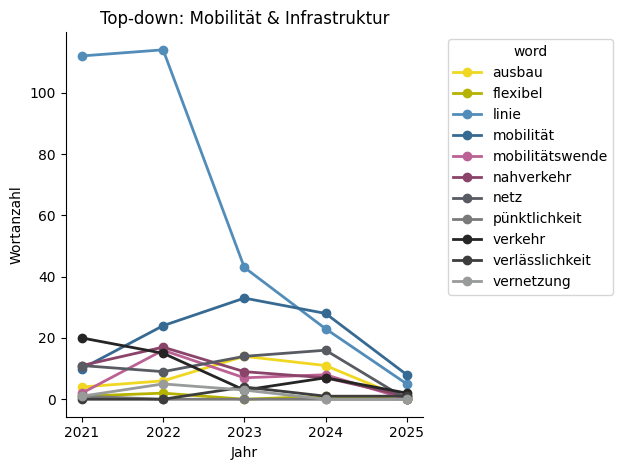

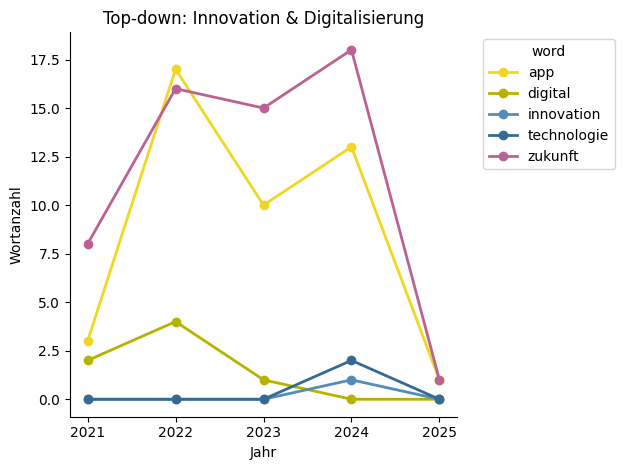

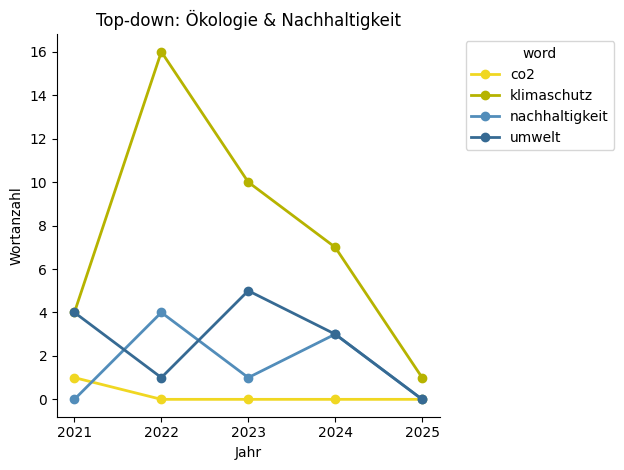

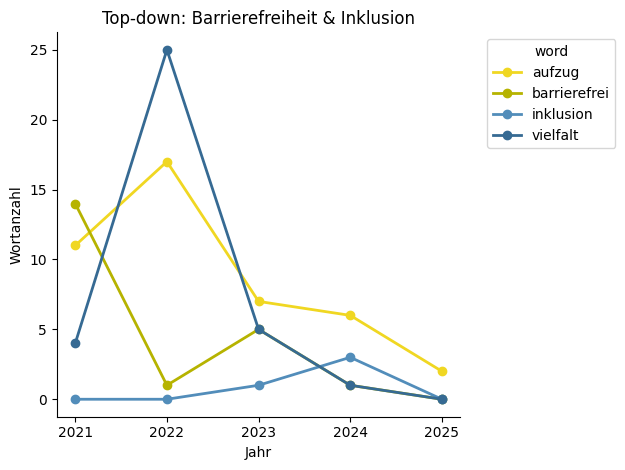

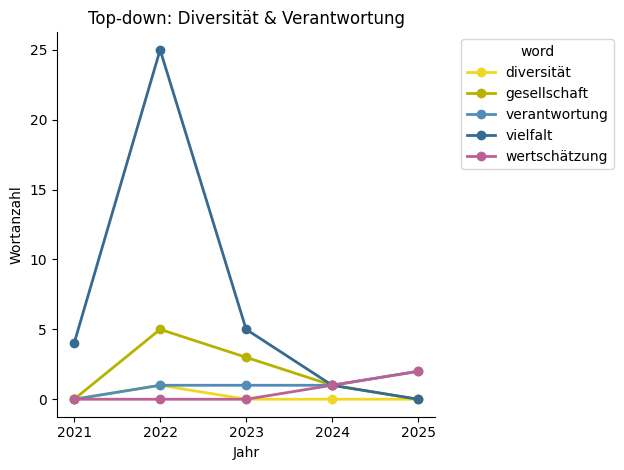

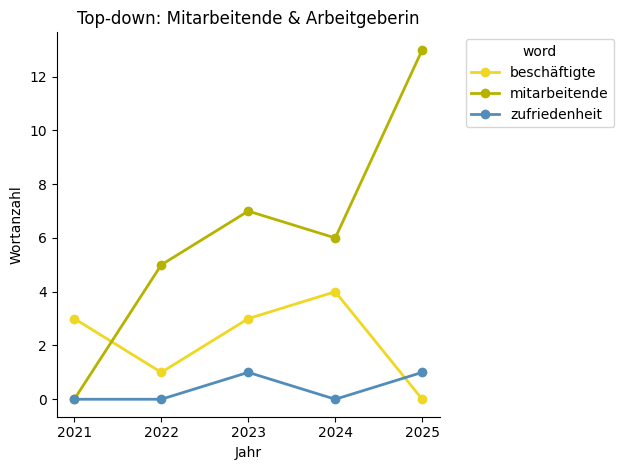

In [5]:
# Plott aus ausgelagerter Funktion
cluster_trend_plot(df_bvg, clusters_topdown, label="Top-down")

In [7]:
# 2. Bottom-up-Analyse (aus Top 50 Wörtern gebildet)
# Vorbereitung
# Summe pro Jahr und Wort
df_bvg["year"] = pd.to_datetime(df_bvg["date"]).dt.year

# Summe pro Jahr und Wort
top_words_by_year = (
    df_bvg.groupby(["year", "word"])["count"]
    .sum()
    .reset_index()
)

# Schleife: Pro Jahr Top 50 Wörter ausgeben
top_n = 50
for year in sorted(top_words_by_year["year"].dropna().unique()):
    print(f"\nTop {top_n} Wörter im Jahr {int(year)}:")
    top_words = (
        top_words_by_year[top_words_by_year["year"] == year]
        .sort_values("count", ascending=False)
        .head(top_n)
    )
    print(top_words[["word", "count"]].to_string(index=False))


Top 50 Wörter im Jahr 2021:
             word  count
              bvg    218
         berliner    155
            linie    112
             2021    110
              uhr    101
           straße     92
           berlin     74
        u-bahnhof     72
        fahrgäste     70
 verkehrsbetriebe     64
           bussen     61
            2021,     61
            fährt     55
          montag,     52
    ersatzverkehr     48
           linien     47
      straßenbahn     45
          bereich     41
            stadt     41
          werden.     41
            busse     39
          oktober     39
           fahren     39
            allee     38
         sonntag,     38
             jahr     36
        fahrzeuge     35
         einsatz.     31
              s+u     31
    informationen     31
         dezember     30
         november     29
             zeit     29
          bahnhof     28
    eingerichtet.     28
             juni     27
            meter     27
        s-bahnhof    

In [8]:
# 2. Bottom-up-Analyse (aus Top 50 Wörtern gebildet)
# Cluster und Begriffe definieren

clusters_bottomup = {
    "Betriebs- und Infrastrukturthemen": ["bauarbeiten", "haltestelle", "einsatz", "bahnhof", "fahren", "fahrzeuge", "betriebshof", "ersatzverkehr", "betrieb", "sicherheit", "netz"],
    "Arbeitskonflikte": ["verdi", "gewerkschaft", "tarif", "verhandlungsrunde", "tarifrunde", "schlichtung", "einigung"], 
    "Verkehrsmittel": ["bus", "busse", "u-bahn", "zug", "straßenbahn", "straßenbahnen"],
    "Service & Kundennähe": ["kunden", "angebot", "ersatzverkehr", "fahrgäste"],
    "Produkte & Innovationen": ["deutschlandticket", "berlkönig", "jelbi", "muva"]
}

In [9]:
# Tabellenansicht aus ausgelagerter Funktion
cluster_trend_table(df_bvg, clusters_bottomup, label="Bottom-up")


Bottom-up – Begriffsentwicklung im Cluster: Betriebs- und Infrastrukturthemen
word  bahnhof  bauarbeiten  betrieb  betriebshof  einsatz  ersatzverkehr  \
year                                                                       
2021       28            8       21           22       15             48   
2022       39           13       22           14       13             49   
2023       14            7       17           15       20             17   
2024       19            1       22            4       27              0   
2025        5            0       14            2        7              0   

word  fahren  fahrzeuge  haltestelle  netz  sicherheit  
year                                                    
2021      39         35           20    11           8  
2022      69         34            8     9           6  
2023      39         28            5    14           9  
2024      17         25            4    16          18  
2025       5          1            0     0    

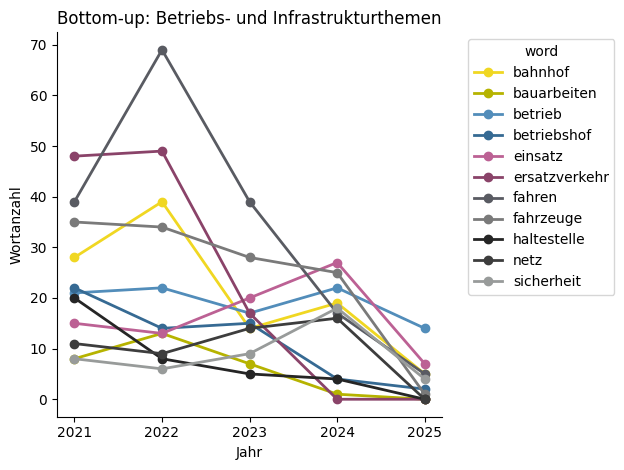

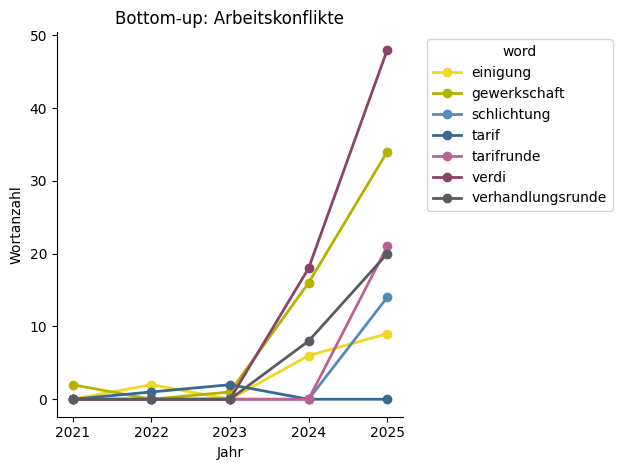

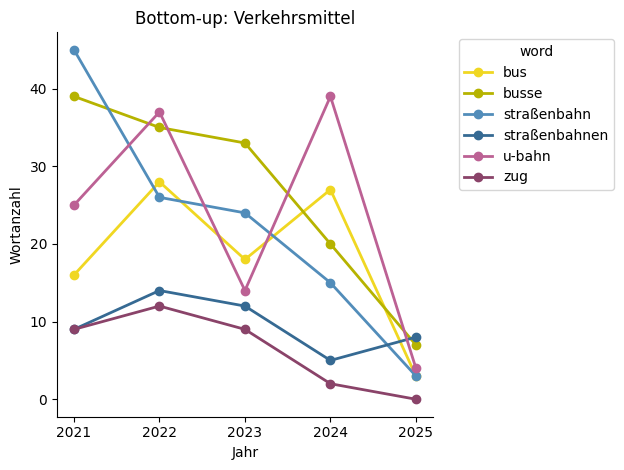

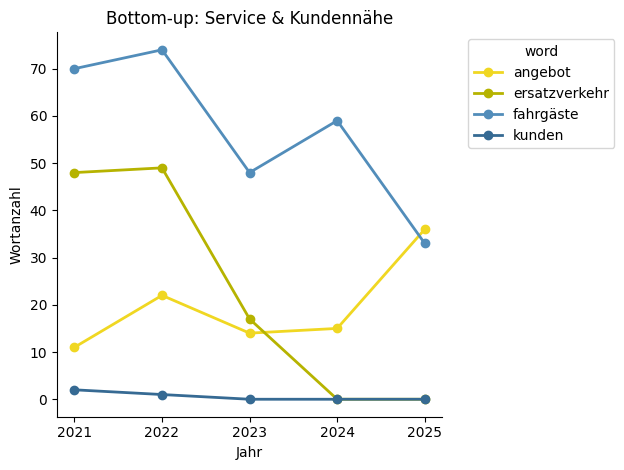

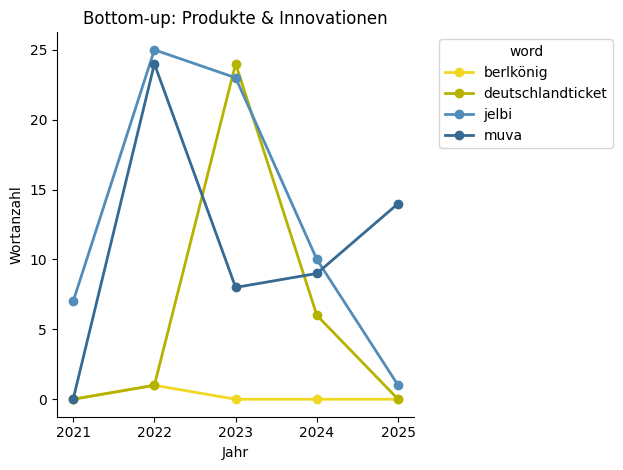

In [10]:
# # 2. Plots
cluster_trend_plot(df_bvg, clusters_bottomup, label="Bottom-up")